In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Cargar el dataset
df = pd.read_csv("BuenosA.csv")  # reemplaza con el nombre correcto
df2 = pd.read_csv("Mexico.csv")  # reemplaza con el nombre correcto

df.head(5)

,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,Candela,01/10/2009,New York NY,within an hour,100,79,1,Palermo,['email' 'phone'],t,...,5.0,1.0,4.82,4.93,4.88,4.93,4.98,4.93,4.86,0.29
1,María,03/08/2016,Buenos Aires Argentina,within an hour,100,100,0,Not specified,['email' 'phone'],t,...,8.0,1.0,4.77,4.76,4.77,4.82,4.90,4.87,4.75,0.80
2,Monica,02/12/2009,No location,Not defined,0,0,0,Not specified,[],f,...,0.0,0.0,4.80,4.76,4.80,4.90,4.80,4.90,4.80,0.27
3,Elbio Mariano,21/12/2009,Buenos Aires Argentina,within an hour,95,94,1,Monserrat,['email' 'phone'],t,...,0.0,0.0,4.80,4.59,4.80,4.83,4.80,4.90,4.80,0.27
4,Sergio,31/01/2010,Buenos Aires Argentina,within an hour,100,99,0,Palermo Hollywood,['email' 'phone'],t,...,25.0,2.0,4.93,4.92,4.87,4.94,4.93,4.93,4.79,1.84


In [32]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_name                    35172 non-null  object 
 1   host_since                   35172 non-null  object 
 2   host_location                35172 non-null  object 
 3   host_response_time           35172 non-null  object 
 4   host_response_rate           35172 non-null  int64  
 5   host_acceptance_rate         35172 non-null  int64  
 6   host_is_superhost            35172 non-null  int64  
 7   host_neighbourhood           35172 non-null  object 
 8   host_verifications           35172 non-null  object 
 9   host_has_profile_pic         35172 non-null  object 
 10  host_identity_verified       35172 non-null  object 
 11  neighbourhood                35172 non-null  object 
 12  neighbourhood_cleansed       35172 non-null  object 
 13  property_type   

In [33]:
# Estadísticas básicas
df.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,price,id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,35172.000000,35172.000000,35172.000000,3.517200e+04,3.517200e+04,35172.000000,35172.000000,35172.000000,35172.000000,35172.000000,...,35172.000000,35172.00000,35172.000000,35172.000000,35172.000000,35172.000000,35172.000000,35172.000000,35172.000000,35172.000000
mean,82.118987,76.119356,0.390964,9.948510e+04,7.117880e+17,7.733379,-34.591809,-58.416629,2.820624,1.131940,...,6.540515,0.37879,4.845687,4.883078,4.822675,4.927319,4.928218,4.921845,4.828434,1.186487
std,35.748456,36.185247,0.487973,1.453553e+06,4.840974e+17,9.700357,0.016816,0.029276,1.149739,0.280262,...,7.922519,0.61740,0.127516,0.128621,0.142436,0.070210,0.088877,0.071737,0.128916,0.994375
min,0.000000,0.000000,0.000000,2.600000e+02,1.150800e+04,1.000000,-34.635050,-58.504396,1.000000,0.500000,...,0.000000,0.00000,4.450000,4.460000,4.370000,4.700000,4.630000,4.680000,4.440000,0.010000
25%,91.000000,70.000000,0.000000,2.971100e+04,4.719776e+07,1.000000,-34.602050,-58.436476,2.000000,1.000000,...,0.000000,0.00000,4.800000,4.820000,4.780000,4.900000,4.900000,4.900000,4.790000,0.380000
50%,100.000000,96.000000,0.000000,3.990800e+04,8.875662e+17,4.000000,-34.591369,-58.418091,2.000000,1.000000,...,4.000000,0.00000,4.830000,4.910000,4.800000,4.920000,4.960000,4.910000,4.800000,0.980000
75%,100.000000,100.000000,1.000000,5.776200e+04,1.095206e+18,7.700000,-34.581480,-58.392114,4.000000,1.100000,...,9.000000,1.00000,4.970000,5.000000,4.940000,5.000000,5.000000,5.000000,4.930000,1.750000
max,100.000000,100.000000,1.000000,1.050217e+08,1.344330e+18,48.000000,-34.548644,-58.355403,7.000000,2.000000,...,32.000000,2.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.300000


In [34]:
# Verificar valores nulos
df.isnull().sum()

host_name                      0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_neighbourhood             0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
bathrooms_text                 0
amenities                      0
price                          0
has_availability               0
first_review                   0
last_review                    0
license                        0
instant_bookable               0
id                             0
host_total_listings_count      0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds      


======================== Buenos Aires ========================
📘 Modelo matemático:
host_acceptance_rate = -0.000000 * price + 76.166493
📊 Índice de correlación de Pearson: -0.0143
📈 Índice de determinación (R²): 0.0010


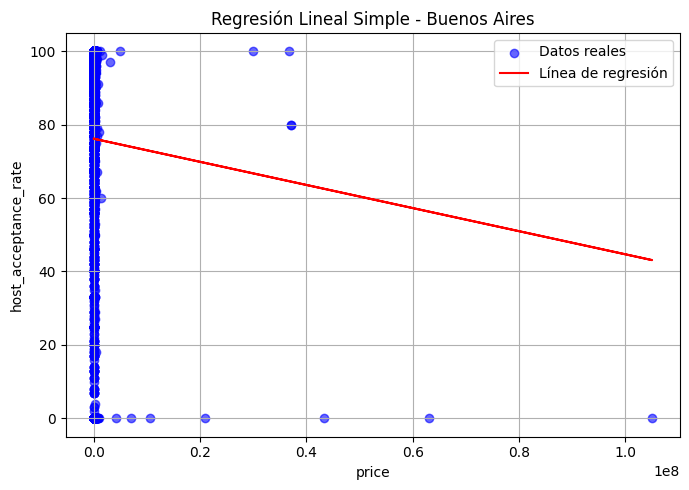


======================== México ========================
📘 Modelo matemático:
host_acceptance_rate = 0.000038 * price + 79.723959
📊 Índice de correlación de Pearson: 0.0089
📈 Índice de determinación (R²): 0.0001


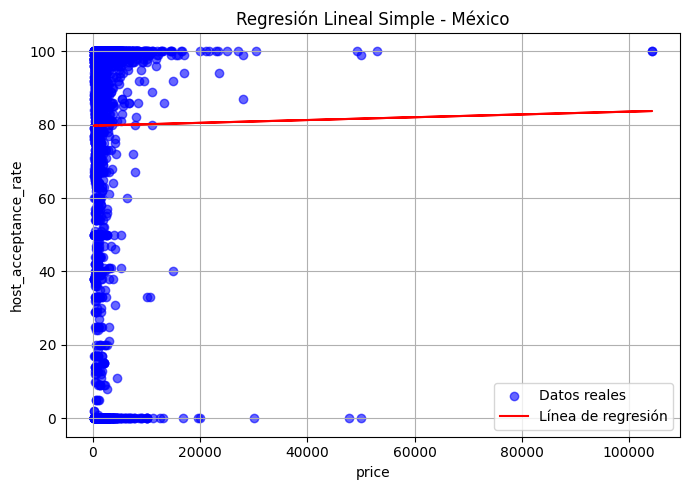

In [46]:
# ---------- DEFINIR UNA FUNCIÓN PARA REPETIR EL ANÁLISIS ----------
def analizar_regresion_lineal(df, nombre_ciudad):
    # 1. Filtrar y limpiar datos
    df_clean = df[['price', 'host_acceptance_rate']].dropna()

    # 2. Variables X e y
    X = df_clean[['price']]
    y = df_clean['host_acceptance_rate']

    # 3. División entrenamiento/prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Modelo de regresión lineal simple
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 5. Predicciones
    y_pred = model.predict(X_test)

    # 6. Índices
    r2 = r2_score(y_test, y_pred)
    pearson_corr = pd.Series(y_test).corr(pd.Series(y_pred))

    # 7. Modelo matemático
    coef = model.coef_[0]
    intercept = model.intercept_
    modelo_matematico = f"host_acceptance_rate = {coef:.6f} * price + {intercept:.6f}"

    # 8. Resultados
    print(f"\n======================== {nombre_ciudad} ========================")
    print("📘 Modelo matemático:")
    print(modelo_matematico)
    print(f"📊 Índice de correlación de Pearson: {pearson_corr:.4f}")
    print(f"📈 Índice de determinación (R²): {r2:.4f}")

    # 9. Visualización
    plt.figure(figsize=(7, 5))
    plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Datos reales')
    plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
    plt.xlabel("price")
    plt.ylabel("host_acceptance_rate")
    plt.title(f"Regresión Lineal Simple - {nombre_ciudad}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------- EJECUCIÓN PARA AMBOS DATAFRAMES ----------
analizar_regresion_lineal(df, "Buenos Aires")
analizar_regresion_lineal(df2, "México")


======================== Buenos Aires ========================
📘 Modelo matemático:
host_is_superhost = -0.000000 * price + 0.392520
📊 Índice de correlación de Pearson: -0.0329
📈 Índice de determinación (R²): 0.0006


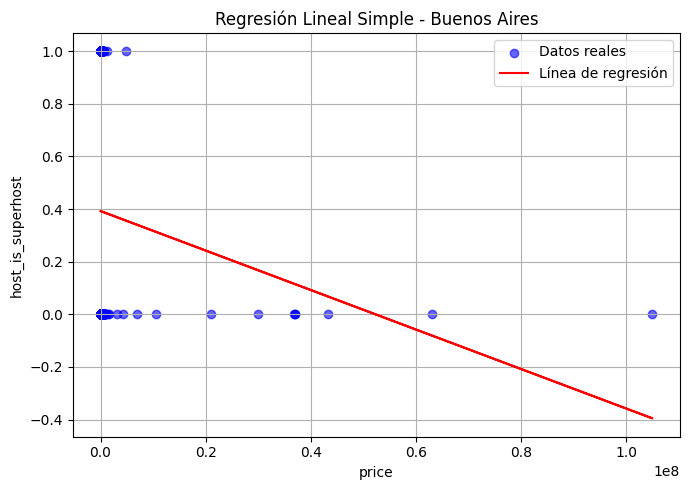


======================== México ========================
📘 Modelo matemático:
host_is_superhost = 0.000002 * price + 0.379353
📊 Índice de correlación de Pearson: 0.0048
📈 Índice de determinación (R²): 0.0000


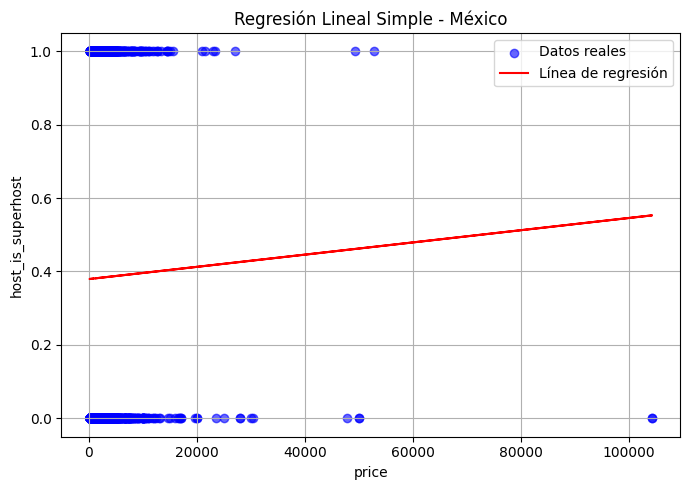

In [47]:
# ---------- DEFINIR UNA FUNCIÓN PARA REPETIR EL ANÁLISIS ----------
def analizar_regresion_lineal(df, nombre_ciudad):
    # 1. Filtrar y limpiar datos
    df_clean = df[['price', 'host_is_superhost']].dropna()

    # 2. Variables X e y
    X = df_clean[['price']]
    y = df_clean['host_is_superhost']

    # 3. División entrenamiento/prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Modelo de regresión lineal simple
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 5. Predicciones
    y_pred = model.predict(X_test)

    # 6. Índices
    r2 = r2_score(y_test, y_pred)
    pearson_corr = pd.Series(y_test).corr(pd.Series(y_pred))

    # 7. Modelo matemático
    coef = model.coef_[0]
    intercept = model.intercept_
    modelo_matematico = f"host_is_superhost = {coef:.6f} * price + {intercept:.6f}"

    # 8. Resultados
    print(f"\n======================== {nombre_ciudad} ========================")
    print("📘 Modelo matemático:")
    print(modelo_matematico)
    print(f"📊 Índice de correlación de Pearson: {pearson_corr:.4f}")
    print(f"📈 Índice de determinación (R²): {r2:.4f}")

    # 9. Visualización
    plt.figure(figsize=(7, 5))
    plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Datos reales')
    plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
    plt.xlabel("price")
    plt.ylabel("host_is_superhost")
    plt.title(f"Regresión Lineal Simple - {nombre_ciudad}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------- EJECUCIÓN PARA AMBOS DATAFRAMES ----------
analizar_regresion_lineal(df, "Buenos Aires")
analizar_regresion_lineal(df2, "México")


======================== Buenos Aires ========================
📘 Modelo matemático:
bathrooms = 0.068489 * accommodates + 0.939311
📊 Índice de correlación de Pearson: -0.0163
📈 Índice de determinación (R²): 0.0740


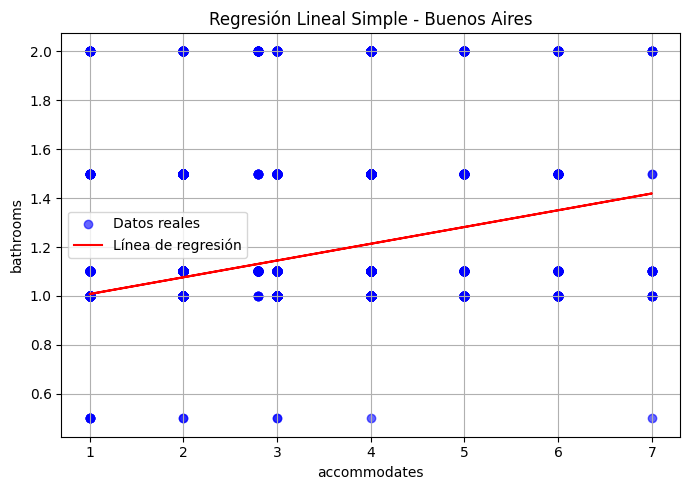


======================== México ========================
📘 Modelo matemático:
bathrooms = 0.150207 * accommodates + 0.918999
📊 Índice de correlación de Pearson: 0.0245
📈 Índice de determinación (R²): 0.1454


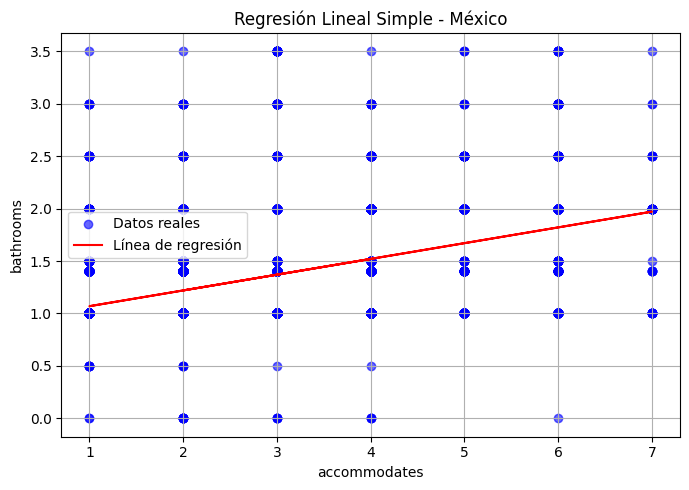

In [48]:
# ---------- DEFINIR UNA FUNCIÓN PARA REPETIR EL ANÁLISIS ----------
def analizar_regresion_lineal(df, nombre_ciudad):
    # 1. Filtrar y limpiar datos
    df_clean = df[['accommodates', 'bathrooms']].dropna()

    # 2. Variables X e y
    X = df_clean[['accommodates']]
    y = df_clean['bathrooms']

    # 3. División entrenamiento/prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Modelo de regresión lineal simple
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 5. Predicciones
    y_pred = model.predict(X_test)

    # 6. Índices
    r2 = r2_score(y_test, y_pred)
    pearson_corr = pd.Series(y_test).corr(pd.Series(y_pred))

    # 7. Modelo matemático
    coef = model.coef_[0]
    intercept = model.intercept_
    modelo_matematico = f"bathrooms = {coef:.6f} * accommodates + {intercept:.6f}"

    # 8. Resultados
    print(f"\n======================== {nombre_ciudad} ========================")
    print("📘 Modelo matemático:")
    print(modelo_matematico)
    print(f"📊 Índice de correlación de Pearson: {pearson_corr:.4f}")
    print(f"📈 Índice de determinación (R²): {r2:.4f}")

    # 9. Visualización
    plt.figure(figsize=(7, 5))
    plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Datos reales')
    plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
    plt.xlabel("accommodates")
    plt.ylabel("bathrooms")
    plt.title(f"Regresión Lineal Simple - {nombre_ciudad}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------- EJECUCIÓN PARA AMBOS DATAFRAMES ----------
analizar_regresion_lineal(df, "Buenos Aires")
analizar_regresion_lineal(df2, "México")


======================== Buenos Aires ========================
📘 Modelo matemático:
review_scores_cleanliness = -0.000000 * price + 4.822616
📊 Índice de correlación de Pearson: -0.0445
📈 Índice de determinación (R²): -0.0000


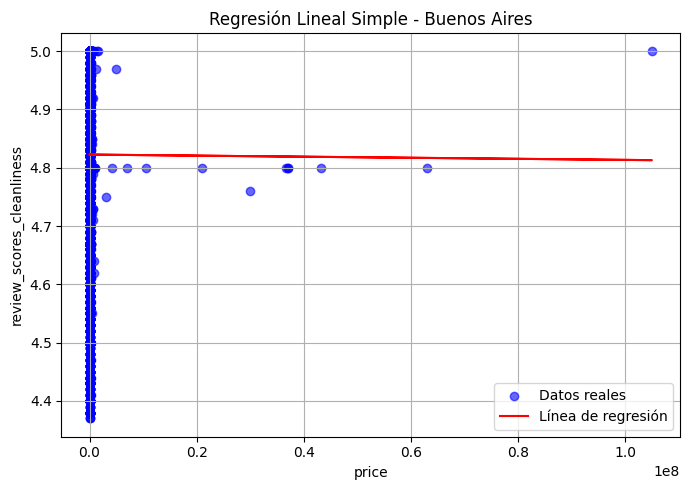


======================== México ========================
📘 Modelo matemático:
review_scores_cleanliness = 0.000000 * price + 4.831390
📊 Índice de correlación de Pearson: 0.0277
📈 Índice de determinación (R²): 0.0003


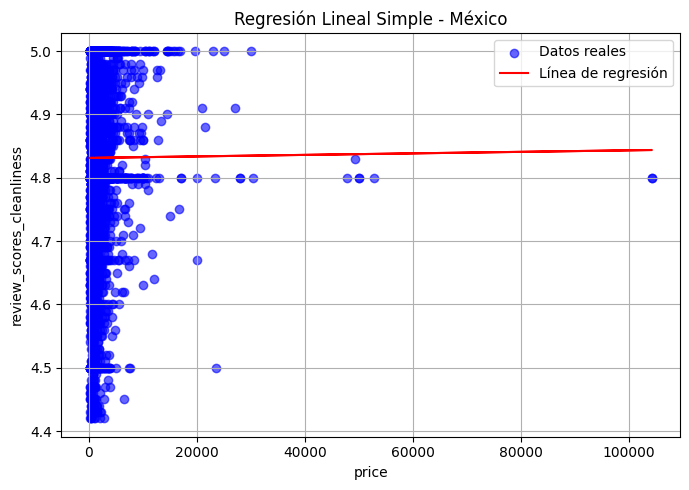

In [49]:
# ---------- DEFINIR UNA FUNCIÓN PARA REPETIR EL ANÁLISIS ----------
def analizar_regresion_lineal(df, nombre_ciudad):
    # 1. Filtrar y limpiar datos
    df_clean = df[['price', 'review_scores_cleanliness']].dropna()

    # 2. Variables X e y
    X = df_clean[['price']]
    y = df_clean['review_scores_cleanliness']

    # 3. División entrenamiento/prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Modelo de regresión lineal simple
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 5. Predicciones
    y_pred = model.predict(X_test)

    # 6. Índices
    r2 = r2_score(y_test, y_pred)
    pearson_corr = pd.Series(y_test).corr(pd.Series(y_pred))

    # 7. Modelo matemático
    coef = model.coef_[0]
    intercept = model.intercept_
    modelo_matematico = f"review_scores_cleanliness = {coef:.6f} * price + {intercept:.6f}"

    # 8. Resultados
    print(f"\n======================== {nombre_ciudad} ========================")
    print("📘 Modelo matemático:")
    print(modelo_matematico)
    print(f"📊 Índice de correlación de Pearson: {pearson_corr:.4f}")
    print(f"📈 Índice de determinación (R²): {r2:.4f}")

    # 9. Visualización
    plt.figure(figsize=(7, 5))
    plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Datos reales')
    plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
    plt.xlabel("price")
    plt.ylabel("review_scores_cleanliness")
    plt.title(f"Regresión Lineal Simple - {nombre_ciudad}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------- EJECUCIÓN PARA AMBOS DATAFRAMES ----------
analizar_regresion_lineal(df, "Buenos Aires")
analizar_regresion_lineal(df2, "México")


======================== Buenos Aires ========================
📘 Modelo matemático:
host_identity_verified = -0.000000 * price + 0.971815
📊 Índice de correlación de Pearson: -0.0081
📈 Índice de determinación (R²): -0.0004


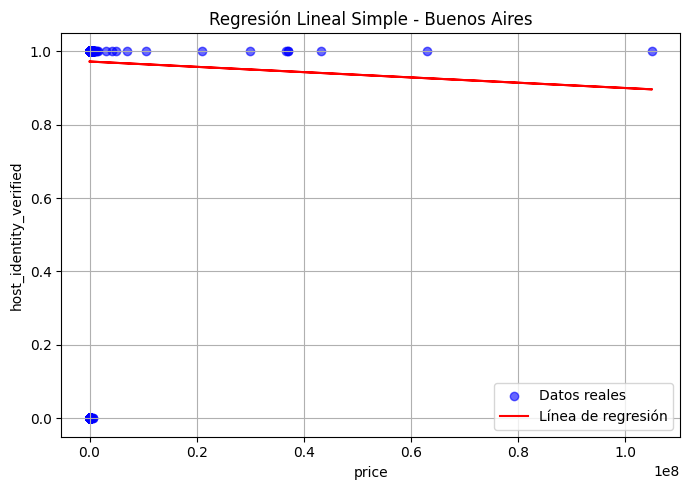


======================== México ========================
📘 Modelo matemático:
host_identity_verified = -0.000000 * price + 0.951599
📊 Índice de correlación de Pearson: 0.0112
📈 Índice de determinación (R²): -0.0000


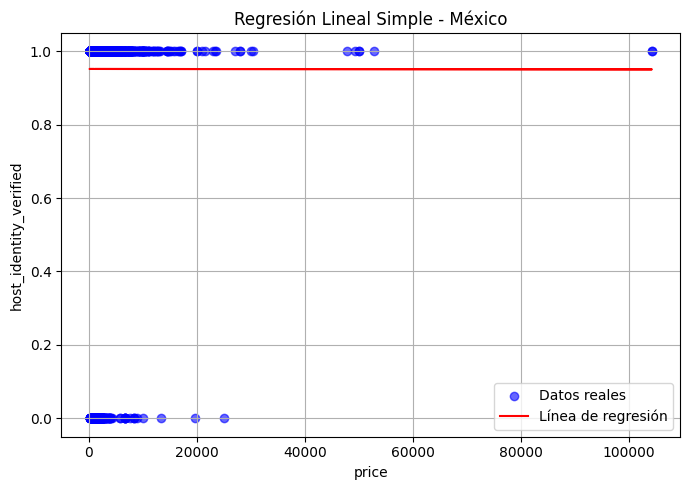

In [52]:
# ---------- DEFINIR UNA FUNCIÓN PARA REPETIR EL ANÁLISIS ----------
def analizar_regresion_lineal(df, nombre_ciudad):
    # 1. Filtrar y limpiar datos
    df_clean = df[['price', 'host_identity_verified']].dropna()

    # 2. Variables X e y
    X = df_clean[['price']]
    y = df_clean['host_identity_verified']

    # 3. División entrenamiento/prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Modelo de regresión lineal simple
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 5. Predicciones
    y_pred = model.predict(X_test)

    # 6. Índices
    r2 = r2_score(y_test, y_pred)
    pearson_corr = pd.Series(y_test).corr(pd.Series(y_pred))

    # 7. Modelo matemático
    coef = model.coef_[0]
    intercept = model.intercept_
    modelo_matematico = f"host_identity_verified = {coef:.6f} * price + {intercept:.6f}"

    # 8. Resultados
    print(f"\n======================== {nombre_ciudad} ========================")
    print("📘 Modelo matemático:")
    print(modelo_matematico)
    print(f"📊 Índice de correlación de Pearson: {pearson_corr:.4f}")
    print(f"📈 Índice de determinación (R²): {r2:.4f}")

    # 9. Visualización
    plt.figure(figsize=(7, 5))
    plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Datos reales')
    plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
    plt.xlabel("price")
    plt.ylabel("host_identity_verified")
    plt.title(f"Regresión Lineal Simple - {nombre_ciudad}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------- EJECUCIÓN PARA AMBOS DATAFRAMES ----------
analizar_regresion_lineal(df, "Buenos Aires")
analizar_regresion_lineal(df2, "México")